In [164]:
#Pre-Processing of data
#WORD COUNT
# Before Removal of Stop words
# data path
patient_df = pd.read_csv("/Users/nikhil/Desktop/data_context.csv")
patient_df['word_count'] = patient_df['Text Details'].apply(lambda x: len(str(x).split(" ")))


     Case  Age                                       Text Details  \
0     1.0   67  I have reviewed this pleasant lady in my priva...   
1     1.0   67  I have reviewed this pleasant lady in my priva...   
2     1.0   67  I have discussed these findings with Mr and Mr...   
3     2.0   81  Thank you for referring this pleasant gentlema...   
4     2.0   81  I am writing to confirm that the above named p...   
5     2.0   81  I have reviewed this pleasant gentleman in my ...   
6     2.0   81  I have reviewed this pleasant gentleman in my ...   
7     2.0   81  I have reviewed this pleasant gentleman in my ...   
8     3.0  100  Thank you for referring this pleasant gentlema...   
9     3.0  100  I reviewed this pleasant gentleman in my priva...   
10    3.0  100  Thank you for referring this pleasant gentlema...   
11    3.0  100  I reviewed this pleasant gentleman in my priva...   
12    3.0  100  Thank you for referring this pleasant gentlema...   
13    3.0  100  I have reviewed th

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a285575c0>]],
      dtype=object)

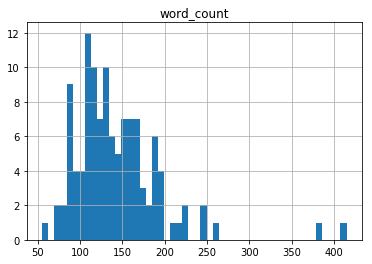

In [165]:
#Word count before stop word removal
patient_df.hist(column='word_count', bins=50)

In [166]:
# After Removal of Stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')
patient_df['Text Details'] = patient_df['Text Details'].apply(lambda x: " ".join(x.lower() for x in x.split()))
patient_df['Text Details'].head()
# Can add moew uncesseary words into the stop list
#print(stop)
patient_df['Text Details'] = patient_df['Text Details'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
patient_df['Text Details'].head()

0    reviewed pleasant lady private outpatient clin...
1    reviewed pleasant lady private outpatient clin...
2    discussed findings mr mrs b today flexible cys...
3    thank referring pleasant gentleman private out...
4    writing confirm named patient underwent succes...
Name: Text Details, dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a28e43940>]],
      dtype=object)

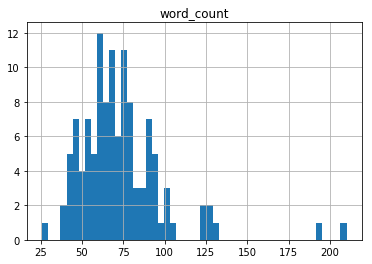

In [167]:
#Word Count
# After Removal of Stop words
patient_df['word_count'] = patient_df['Text Details'].apply(lambda x: len(str(x).split(" ")))

#Word count before stop word removal
patient_df.hist(column='word_count', bins=50)

In [175]:
#Removing Punctuation
patient_df['Text Details'] = patient_df['Text Details'].str.replace('[^\w\s]','')
#most common words in the Text

most_common_patient_words = pd.Series(' '.join(patient_df['Text Details']).split()).value_counts()[:20]



In [178]:
mcpw = list(most_common_patient_words.index)

patient_df['Text Details'] = patient_df['Text Details'].apply(lambda x: " ".join(x for x in x.split() if x not in mcpw))
patient_df['Text Details'].head()

0


In [179]:
#Rare Words Removal
rpw = pd.Series(' '.join(patient_df['Text Details']).split()).value_counts()[-10:]
print(rpw)

extensions      1
ease            1
pcc             1
treat           1
infiltrating    1
regrowth        1
proceeding      1
gets            1
60mls           1
plus            1
dtype: int64


In [180]:
#Lemmatization
from textblob import Word
patient_df['Text Details'] = patient_df['Text Details'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
patient_df['Text Details']

patient_df.to_csv("pre_processed_patient_diagnostics.csv")

In [184]:
#Term Frequency
tf1 = patient_df['Text Details'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()

tf1.columns = ['words','tf']


In [185]:
#Inverse Document frequency
import numpy as np
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(patient_df.shape[0]/(len(patient_df[patient_df['Text Details'].str.contains(word)])))
    
print(tf1)

               words     tf       idf
0           hospital  116.0  0.240385
1             biopsy   50.0  1.206826
2              renal   20.0  2.459589
3        springfield   87.0  0.418369
4                bed    4.0  4.069027
5           reviewed   86.0  0.319523
6         broomfield   21.0  2.197225
7              today  165.0  0.284837
8                 mr   72.0  1.098612
9                 nh    4.0  3.663562
10                 b   25.0  0.000000
11        recurrence   72.0  0.773190
12             taken    9.0  2.682732
13           carried   72.0  0.736822
14          previous   43.0  0.955511
15             local   13.0  2.197225
16             ready    2.0  4.069027
17              felt    8.0  2.816264
18           private   96.0  0.284837
19          negative    9.0  2.682732
20         therefore    9.0  2.564949
21        outpatient   75.0  0.444686
22      demonstrated   73.0  0.603291
23              many    3.0  3.663562
24       abnormality    5.0  3.152736
25          

In [186]:
#TF-IDF

tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1.sort_values('tfidf', ascending=(False))

,words,tf,idf,tfidf
8,mr,72.0,1.098612,79.100085
200,bcg,51.0,1.504077,76.707947
224,would,53.0,1.360977,72.131757
57,right,69.0,0.912026,62.929817
94,scan,55.0,1.124588,61.852328
199,course,41.0,1.504077,61.667173
186,week,52.0,1.178655,61.290060
1,biopsy,50.0,1.206826,60.341294
113,time,71.0,0.791882,56.223624
56,tumour,51.0,1.098612,56.029227


In [187]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',stop_words= 'english',ngram_range=(1,1))
patient_df_vect = tfidf.fit_transform(patient_df['Text Details'])

print(patient_df_vect) # Using tfidfVectorizer

  (0, 774)	0.0765730180801566
  (0, 651)	0.03728918951294872
  (0, 468)	0.09809972507448116
  (0, 679)	0.03728918951294872
  (0, 619)	0.04188189962969649
  (0, 220)	0.03601049408570687
  (0, 851)	0.12337915822276282
  (0, 429)	0.18005247042853437
  (0, 912)	0.07457837902589744
  (0, 669)	0.040390001514240305
  (0, 426)	0.04265756257042687
  (0, 675)	0.060550628449174346
  (0, 776)	0.0552476899221072
  (0, 709)	0.12103250925397649
  (0, 568)	0.08907867157107711
  (0, 714)	0.12103250925397649
  (0, 884)	0.1476834084098087
  (0, 766)	0.10393635997894402
  (0, 751)	0.3923989002979246
  (0, 160)	0.4076705929855301
  (0, 792)	0.12752278147487464
  (0, 911)	0.12103250925397649
  (0, 494)	0.0910853731522545
  (0, 731)	0.10257639796742982
  (0, 150)	0.06281818950536092
  :	:
  (116, 652)	0.1253256040693956
  (116, 790)	0.06501566189895105
  (116, 359)	0.16004438238323185
  (116, 513)	0.16063295828121163
  (116, 128)	0.14677470951298013
  (116, 381)	0.0688021627000355
  (116, 280)	0.058307439447

In [146]:
#!pip install scattertext
#!pip install jieba
#!pip install spacy
#!pip install empath
#!pip install umap-learn
!pwd


/Users/nikhil


In [202]:
#Using Scattertext as a text analysis library: finding characteristic terms and their associations
import pandas as pd
import scattertext as st
import spacy
from pprint import pprint
#It should have at least two columns, the text you'd like to analyze, and the category you'd like to study. 
#Surgery for Urinary Bladder (Surgery - Yes OR No)
#Text of diagnostics (Text Details)


new_patient_df = pd.read_csv("/Users/nikhil/pre_processed_patient_diagnostics.csv")

print(new_patient_df.columns.values)

['Unnamed: 0' 'Case' 'Age' 'Text Details' 'Surgery - Yes OR No'
 'word_count']


In [203]:
# Turn it into a Scattertext Corpus 

nlp = spacy.load('en')
corpus = st.CorpusFromPandas(new_patient_df,category_col='Surgery - Yes OR No',text_col='Text Details',nlp=nlp).build()

In [204]:
print(list(corpus.get_scaled_f_scores_vs_background().index[:10]))

['turbt', 'nephroureterectomy', 'turis', 'cystoscopy', 'cystoprostatectomy', 'urogram', 'haematuria', 'urethroscopy', 'detrusitol', 'haematospermia']


In [205]:
term_freq_df = corpus.get_term_freq_df()
print(term_freq_df)

                         Y freq  N freq
term                                   
reviewed                     77       9
pleasant                     73      15
lady                          8       2
private                      74      22
outpatient                   62      13
clinic                       86      20
springfield                  71      16
hospital                     89      27
today                       141      24
present                      72      18
history                      61      29
previous                     38       5
right                        59      10
radical                       4       0
nephrectomy                  12       4
rcc                           4       0
t2pt2                         1       0
residual                      7       2
renal                        15       5
bed                           4       0
scar                          2       1
tissue                        4       0
local                        11       2


In [206]:
term_freq_df['Surgery Yes Score'] = corpus.get_scaled_f_scores('Y')
#Terms that are most associated with Surgery is Yes
print(term_freq_df)
pprint(list(term_freq_df.sort_values(by='Surgery Yes Score',ascending=False).index[:10]))

                         Y freq  N freq  Surgery Yes Score
term                                                      
reviewed                     77       9           0.955752
pleasant                     73      15           0.919325
lady                          8       2           0.327262
private                      74      22           0.177026
outpatient                   62      13           0.917559
clinic                       86      20           0.907887
springfield                  71      16           0.910941
hospital                     89      27           0.174621
today                       141      24           0.934037
present                      72      18           0.197536
history                      61      29           0.122629
previous                     38       5           0.949842
right                        59      10           0.934335
radical                       4       0           0.661488
nephrectomy                  12       4           0.1741

In [207]:
term_freq_df['Surgery No Score'] = corpus.get_scaled_f_scores('N')
pprint(list(term_freq_df.sort_values(by='Surgery No Score',ascending=False).index[:10]))

['medical history',
 'referring pleasant',
 'past medical',
 'history includes',
 'examined',
 'includes',
 'limit',
 'examined within',
 'abdomen examined',
 'within normal']


In [208]:
html = st.produce_scattertext_explorer(corpus,category='Y',category_name='Surgery Yes',not_category_name='N',
width_in_pixels=1000,metadata=new_patient_df['Surgery - Yes OR No'])

open("Surgery-Visualization.html", 'wb').write(html.encode('utf-8'))

428429

In [209]:
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt
Yes_surgery_data = new_patient_df.loc[new_patient_df['Surgery - Yes OR No'] == 'Y']
No_surgery_data = new_patient_df.loc[new_patient_df['Surgery - Yes OR No'] == 'N']

Yes_surgery_list= Yes_surgery_data['Text Details'].tolist()
No_surgery_list = No_surgery_data['Text Details'].tolist()

str1 = ''.join(Yes_surgery_list)
str2 = ''.join(No_surgery_list)

Text(0.5,1,'Surgery Yes Terms')

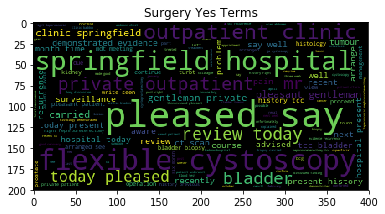

In [210]:
Surgery_Yes_cloud = WordCloud(stopwords=STOPWORDS).generate(str1)
#Surgery_No_cloud = WordCloud(stopwords=STOPWORDS).generate(No_surgery_list)
print(Surgery_Yes_cloud)
plt.figure(1)
plt.imshow(Surgery_Yes_cloud)
plt.title('Surgery Yes Terms')

Text(0.5,1,'Surgery NO Terms')

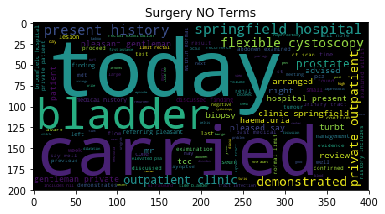

In [211]:
Surgery_No_cloud = WordCloud(stopwords=STOPWORDS).generate(str2)
print(Surgery_No_cloud)
plt.figure(1)
plt.imshow(Surgery_No_cloud)
plt.title('Surgery NO Terms')